In [1]:
##############################################################################################################
# DESCRIPTION: Carga un modelo.
#              
# RESULTS:     VI0342_04_00noisy_idx014 es un ejemplo de imagen que puntúa bien pero no.
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################
import os, sys

IMG_WIDTH = 64
IMG_HEIGHT = 64

IMG_CASE = str(IMG_WIDTH) +  "/0001_0100"
SAVED_MODEL = "0001_0100-64-unet-xn4"

class RadianceLimits:
    pass

radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0174
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.8130

In [3]:
##################
# PATHS
##################

IMG_PATH = os.path.abspath(os.path.join('../../../dataset/cases/', IMG_CASE))
IMG_PATH_VALID = os.path.join( IMG_PATH , 'validation')
IMG_PATH_TEST = IMG_PATH + "/test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

In [4]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)

import DatasetUtilsTifF as dsutils
import ReportsK as reports
import keras.models

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid \
    = dsutils.readDataset( IMG_PATH_TRAIN, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid \
    = dsutils.readDataset( IMG_PATH_VALID, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid \
    = dsutils.reshapeDataset( train_noisy, train_nitid, IMG_WIDTH, IMG_HEIGHT )

val_noisy, val_nitid \
    = dsutils.reshapeDataset( val_noisy, val_nitid, IMG_WIDTH, IMG_HEIGHT )

Read dataset. Path: E:\Projects\VenusDenoise\dataset\cases\64\0001_0100
Noisy files:8086
Nitid files:8086
Read dataset. Path: E:\Projects\VenusDenoise\dataset\cases\64\0001_0100\validation
Noisy files:2000
Nitid files:2000


In [6]:
model = keras.models.load_model(os.path.abspath(os.path.join('../../../saves/' + SAVED_MODEL)), compile=False)

In [7]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Images count =2000
Best RMSENZ  =1936 (0.97)
Best MAENZ   =1911 (0.96)
Best PSNR    =1936 (0.97)
Best Accuracy=1654 (0.83)
RMSE-NZ  Pred=0.0478  Noisy=0.1151
MAE-NZ   Pred=0.0400  Noisy=0.0945
PSNR     Pred=12.6 dB Noisy=5.1 dB
Accuracy Pred=0.30    Noisy=0.12
SSM      Pred=0.87    Noisy=0.30
HOG MSE  Pred=0.09    Noisy=0.15


In [8]:
reports.saveMetrics( DEST_TESTS, SAVED_MODEL, predictions_headers, predictions_metrics )
#reports.saveScores( DEST_TESTS, SAVED_MODEL, predictions_metrics )

In [9]:
len(predictions_metrics)

2000

Read dataset. Path: E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test/
Noisy files:18
Nitid files:18
Index:0
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0025_06_00_0_noisy_idx068.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0025_06_00_0_nitid_idx076.tif


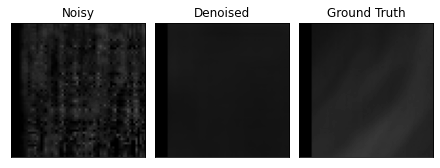

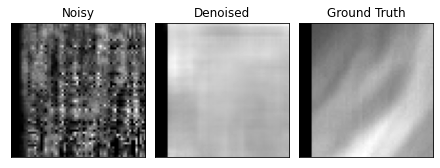

RMSE-NZ  Pred=0.0636  Noisy=0.0762 BEST
MAE-NZ   Pred=0.0531  Noisy=0.0607 BEST
PSNR     Pred=10.8 dB Noisy=9.3 dB BEST
Accuracy Pred=0.14    Noisy=0.11 BEST
SSM      Pred=0.82    Noisy=0.42
HOG MSE  Pred=0.05    Noisy=0.15
******************************************************
Index:1
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0025_07_00_9_noisy_idx068.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0025_07_00_9_nitid_idx076.tif


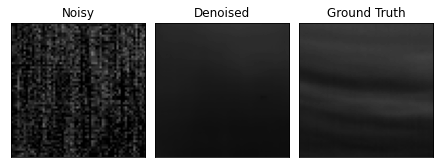

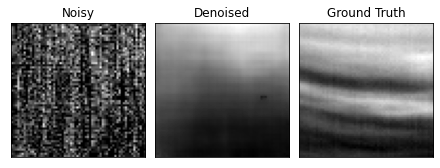

RMSE-NZ  Pred=0.0552  Noisy=0.1043 BEST
MAE-NZ   Pred=0.0475  Noisy=0.0869 BEST
PSNR     Pred=13.2 dB Noisy=7.7 dB BEST
Accuracy Pred=0.06    Noisy=0.06 WORST
SSM      Pred=0.88    Noisy=0.13
HOG MSE  Pred=0.09    Noisy=0.22
******************************************************
Index:2
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0025_07_01_11_noisy_idx089.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0025_07_01_11_nitid_idx076.tif


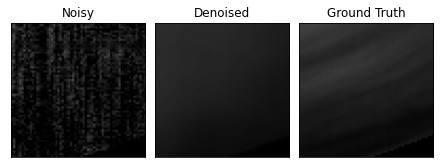

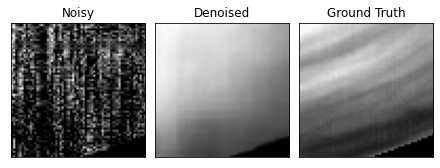

RMSE-NZ  Pred=0.0309  Noisy=0.0960 BEST
MAE-NZ   Pred=0.0249  Noisy=0.0800 BEST
PSNR     Pred=18.2 dB Noisy=8.4 dB BEST
Accuracy Pred=0.27    Noisy=0.06 BEST
SSM      Pred=0.92    Noisy=0.23
HOG MSE  Pred=0.07    Noisy=0.21
******************************************************
Index:3
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0025_07_01_2_noisy_idx089.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0025_07_01_2_nitid_idx076.tif


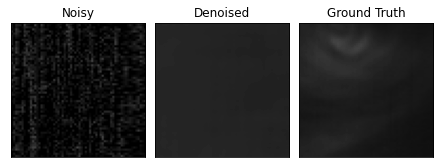

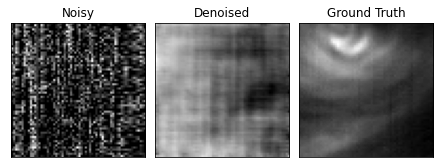

RMSE-NZ  Pred=0.0398  Noisy=0.0938 BEST
MAE-NZ   Pred=0.0337  Noisy=0.0805 BEST
PSNR     Pred=16.6 dB Noisy=9.1 dB BEST
Accuracy Pred=0.16    Noisy=0.06 BEST
SSM      Pred=0.89    Noisy=0.16
HOG MSE  Pred=0.10    Noisy=0.11
******************************************************
Index:4
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0025_07_01_5_noisy_idx089.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0025_07_01_5_nitid_idx076.tif


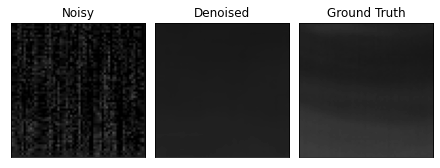

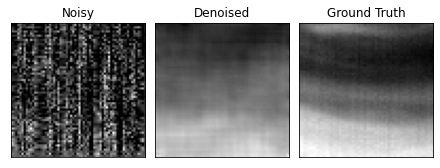

RMSE-NZ  Pred=0.0506  Noisy=0.1096 BEST
MAE-NZ   Pred=0.0411  Noisy=0.0957 BEST
PSNR     Pred=13.5 dB Noisy=6.8 dB BEST
Accuracy Pred=0.18    Noisy=0.05 BEST
SSM      Pred=0.93    Noisy=0.20
HOG MSE  Pred=0.05    Noisy=0.15
******************************************************
Index:5
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0338_05_01_10_noisy_idx089.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0338_05_01_10_nitid_idx076.tif


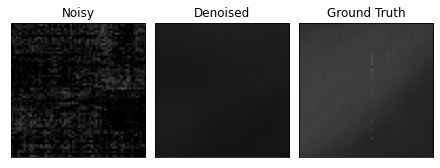

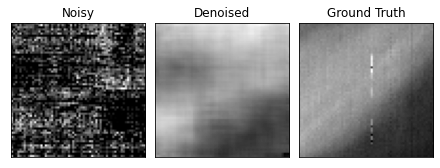

RMSE-NZ  Pred=0.1117  Noisy=0.1594 BEST
MAE-NZ   Pred=0.1073  Noisy=0.1452 BEST
PSNR     Pred=9.2 dB Noisy=6.1 dB BEST
Accuracy Pred=0.00    Noisy=0.02 WORST
SSM      Pred=0.72    Noisy=0.21
HOG MSE  Pred=0.08    Noisy=0.07
******************************************************
Index:6
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0361_04_00_15_noisy_idx068.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0361_04_00_15_nitid_idx076.tif


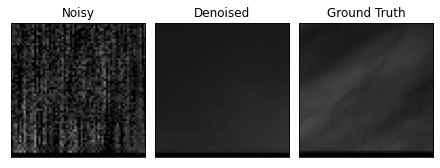

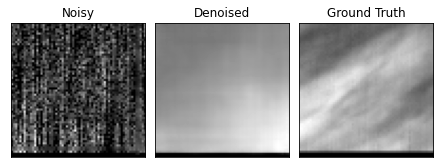

RMSE-NZ  Pred=0.0683  Noisy=0.1126 BEST
MAE-NZ   Pred=0.0556  Noisy=0.0917 BEST
PSNR     Pred=12.5 dB Noisy=8.1 dB BEST
Accuracy Pred=0.11    Noisy=0.07 BEST
SSM      Pred=0.79    Noisy=0.14
HOG MSE  Pred=0.04    Noisy=0.27
******************************************************
Index:7
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0361_04_01_7_noisy_idx089.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0361_04_01_7_nitid_idx076.tif


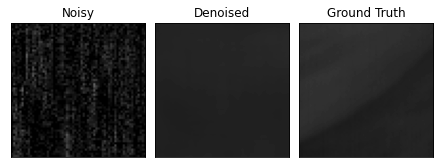

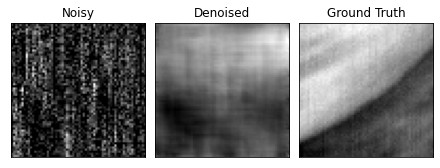

RMSE-NZ  Pred=0.0338  Noisy=0.1147 BEST
MAE-NZ   Pred=0.0268  Noisy=0.1006 BEST
PSNR     Pred=15.8 dB Noisy=5.2 dB BEST
Accuracy Pred=0.31    Noisy=0.05 BEST
SSM      Pred=0.92    Noisy=0.16
HOG MSE  Pred=0.12    Noisy=0.19
******************************************************
Index:8
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0362_04_01_15_noisy_idx089.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0362_04_01_15_nitid_idx076.tif


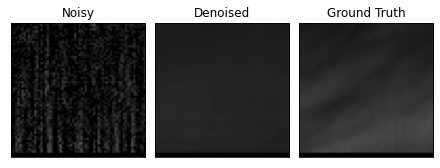

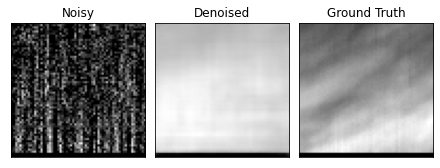

RMSE-NZ  Pred=0.0613  Noisy=0.1357 BEST
MAE-NZ   Pred=0.0442  Noisy=0.1172 BEST
PSNR     Pred=13.5 dB Noisy=6.6 dB BEST
Accuracy Pred=0.27    Noisy=0.04 BEST
SSM      Pred=0.88    Noisy=0.17
HOG MSE  Pred=0.04    Noisy=0.25
******************************************************
Index:9
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0363_00_00_0_noisy_idx068.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0363_00_00_0_nitid_idx076.tif


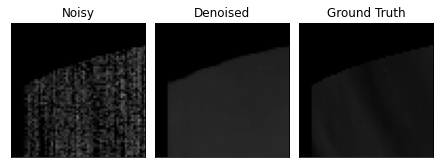

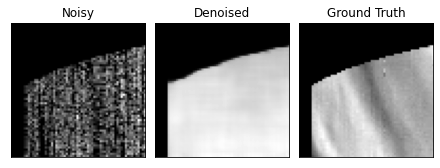

RMSE-NZ  Pred=0.0528  Noisy=0.1015 BEST
MAE-NZ   Pred=0.0413  Noisy=0.0807 BEST
PSNR     Pred=6.9 dB Noisy=1.2 dB BEST
Accuracy Pred=0.36    Noisy=0.10 BEST
SSM      Pred=0.85    Noisy=0.45
HOG MSE  Pred=0.09    Noisy=0.08
******************************************************
Index:10
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0365_00_01_9_noisy_idx089.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0365_00_01_9_nitid_idx076.tif


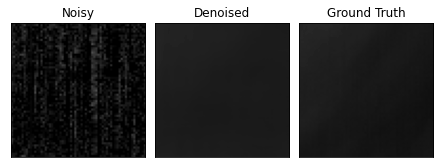

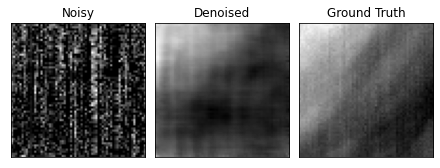

RMSE-NZ  Pred=0.0189  Noisy=0.0762 BEST
MAE-NZ   Pred=0.0155  Noisy=0.0669 BEST
PSNR     Pred=18.5 dB Noisy=6.3 dB BEST
Accuracy Pred=0.39    Noisy=0.07 BEST
SSM      Pred=0.96    Noisy=0.17
HOG MSE  Pred=0.05    Noisy=0.08
******************************************************
Index:11
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0567_01_01_8_noisy_idx089.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0567_01_01_8_nitid_idx076.tif


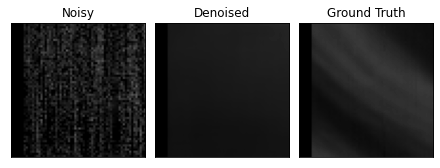

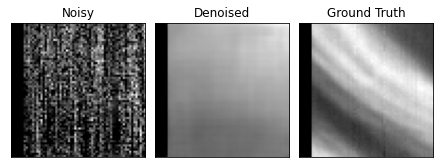

RMSE-NZ  Pred=0.0636  Noisy=0.0960 BEST
MAE-NZ   Pred=0.0519  Noisy=0.0792 BEST
PSNR     Pred=11.1 dB Noisy=7.5 dB BEST
Accuracy Pred=0.19    Noisy=0.07 BEST
SSM      Pred=0.78    Noisy=0.25
HOG MSE  Pred=0.10    Noisy=0.20
******************************************************
Index:12
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0567_02_01_9_noisy_idx089.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0567_02_01_9_nitid_idx076.tif


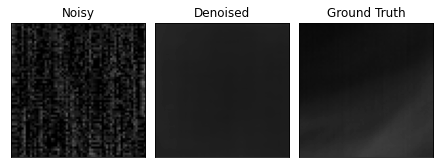

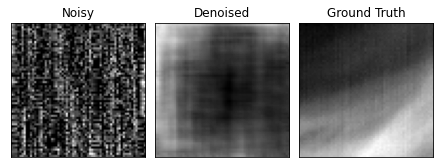

RMSE-NZ  Pred=0.0575  Noisy=0.0971 BEST
MAE-NZ   Pred=0.0496  Noisy=0.0798 BEST
PSNR     Pred=12.6 dB Noisy=8.0 dB BEST
Accuracy Pred=0.09    Noisy=0.07 BEST
SSM      Pred=0.79    Noisy=0.14
HOG MSE  Pred=0.11    Noisy=0.15
******************************************************
Index:13
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0567_03_00_9_noisy_idx068.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0567_03_00_9_nitid_idx076.tif


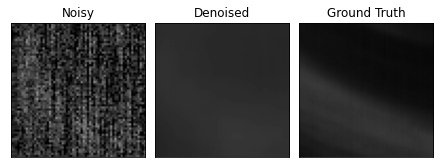

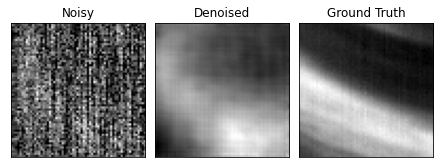

RMSE-NZ  Pred=0.0805  Noisy=0.1540 BEST
MAE-NZ   Pred=0.0662  Noisy=0.1226 BEST
PSNR     Pred=8.9 dB Noisy=3.3 dB BEST
Accuracy Pred=0.17    Noisy=0.05 BEST
SSM      Pred=0.73    Noisy=0.08
HOG MSE  Pred=0.07    Noisy=0.19
******************************************************
Index:14
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0569_02_01_11_noisy_idx089.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0569_02_01_11_nitid_idx076.tif


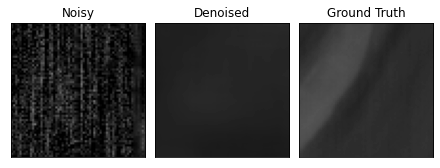

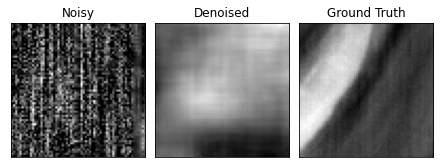

RMSE-NZ  Pred=0.0895  Noisy=0.1426 BEST
MAE-NZ   Pred=0.0715  Noisy=0.1207 BEST
PSNR     Pred=11.4 dB Noisy=7.4 dB BEST
Accuracy Pred=0.07    Noisy=0.04 BEST
SSM      Pred=0.75    Noisy=0.12
HOG MSE  Pred=0.13    Noisy=0.19
******************************************************
Index:15
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0571_02_01_10_noisy_idx089.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0571_02_01_10_nitid_idx076.tif


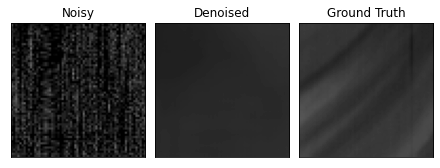

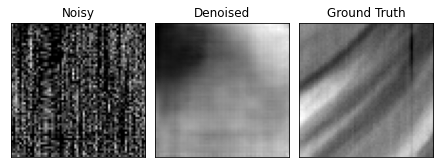

RMSE-NZ  Pred=0.0647  Noisy=0.1416 BEST
MAE-NZ   Pred=0.0541  Noisy=0.1219 BEST
PSNR     Pred=14.4 dB Noisy=7.5 dB BEST
Accuracy Pred=0.07    Noisy=0.04 BEST
SSM      Pred=0.77    Noisy=0.11
HOG MSE  Pred=0.13    Noisy=0.27
******************************************************
Index:16
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0571_03_00_11_noisy_idx068.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0571_03_00_11_nitid_idx076.tif


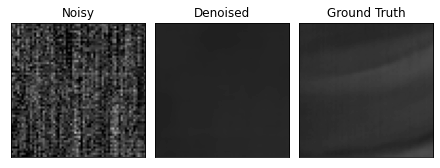

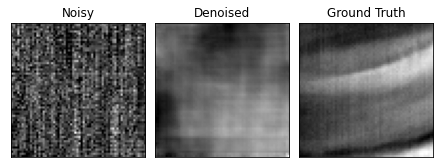

RMSE-NZ  Pred=0.0616  Noisy=0.1312 BEST
MAE-NZ   Pred=0.0542  Noisy=0.1051 BEST
PSNR     Pred=13.8 dB Noisy=7.2 dB BEST
Accuracy Pred=0.02    Noisy=0.05 WORST
SSM      Pred=0.89    Noisy=0.07
HOG MSE  Pred=0.12    Noisy=0.18
******************************************************
Index:17
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0706_02_01_3_noisy_idx089.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100/test\VI0706_02_01_3_nitid_idx076.tif


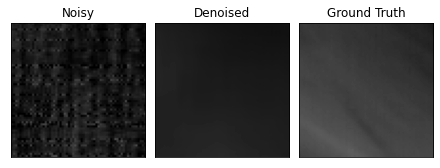

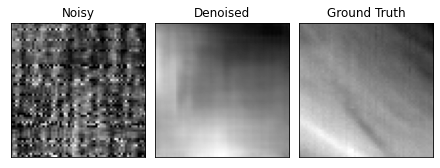

RMSE-NZ  Pred=0.1348  Noisy=0.1634 BEST
MAE-NZ   Pred=0.1312  Noisy=0.1488 BEST
PSNR     Pred=8.6 dB Noisy=7.0 dB BEST
Accuracy Pred=0.00    Noisy=0.01 WORST
SSM      Pred=0.71    Noisy=0.37
HOG MSE  Pred=0.10    Noisy=0.12
******************************************************


In [10]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid \
    = dsutils.readDataset( IMG_PATH_TEST, IMG_WIDTH, IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid \
    = dsutils.reshapeDataset( test_noisy, test_nitid, IMG_WIDTH, IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, \
                        test_indexes, ACCURACY_THRESHOLD )

Index:2
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100\validation\VI0025_06_00_1_noisy_idx068.tif
E:\Projects\VenusDenoise\dataset\cases\64\0001_0100\validation\VI0025_06_00_1_nitid_idx076.tif


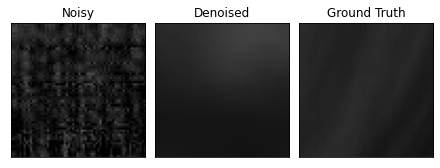

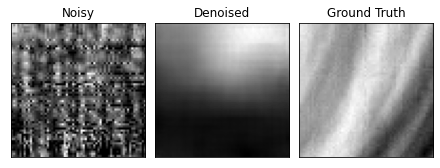

RMSE-NZ  Pred=0.0510  Noisy=0.0744 BEST
MAE-NZ   Pred=0.0423  Noisy=0.0610 BEST
PSNR     Pred=10.8 dB Noisy=7.5 dB BEST
Accuracy Pred=0.14    Noisy=0.10 BEST
SSM      Pred=0.83    Noisy=0.27
HOG MSE  Pred=0.25    Noisy=0.20
******************************************************


In [11]:
test_indexes = np.array([2])
reports.predictByIndexes( model, val_noisy, val_nitid, val_noisy_files, val_nitid_files, \
                        test_indexes, ACCURACY_THRESHOLD, \
                        save_pred = True, save_folder_name = DEST_TESTS )